In [232]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

In [19]:
X, y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1, noise=40, random_state=20)

In [234]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

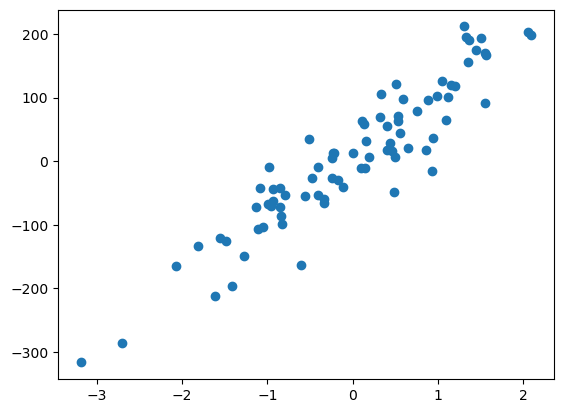

In [236]:
plt.scatter(X_train, y_train)

In [246]:
# finding the actual slope and intercepts by fitting the data into Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)

In [248]:
lr.coef_

array([95.97703309])

In [250]:
lr.intercept_

6.1886002024989555

In [252]:
r2_score(y_test, pred)

0.8024149176047709

In [29]:
m = 96.20
# b = 4.58

In [381]:
class SGDRegressor:
    def __init__(self, learning_rate, epochs):
        self.m = m
        self.b = -100
        self.learning_rate = learning_rate
        self.epochs = epochs

    def fit(self,X,y):
        # calcualte the b using GD
        for i in range(self.epochs):
            loss_slope_b = -2 * np.sum(y - self.m*X.ravel() - self.b)
            loss_slope_m = -2 * np.sum((y - self.m*X.ravel() - self.b)*X.ravel())
            
            self.b = self.b - (self.learning_rate * loss_slope_b)
            self.m = self.m - (self.learning_rate * loss_slope_m)
        print(self.m,self.b)

    def predict(self, X):
        return self.m * X + self.b

In [383]:
sgd = SGDRegressor(0.001, 100)
sgd.fit(X_train, y_train)

95.9770331582418 6.188597354590854


Now as you may see, we are getting closer to our original value of intercept.

In [387]:
pred1 = sgd.predict(X_test)
pred1

array([[  29.77161033],
       [   1.9469115 ],
       [  40.68552583],
       [-132.19575109],
       [  88.44991904],
       [  68.28900906],
       [  40.50389139],
       [-218.71072826],
       [ -41.16751522],
       [-150.20612388],
       [   9.85419719],
       [-176.30828099],
       [ -78.79840851],
       [  36.99442097],
       [  -6.29136454],
       [  59.38626098],
       [ -84.99131269],
       [ 148.34437024],
       [  72.5089306 ],
       [-136.40636276]])

In [389]:
y_test

array([  55.88607047,   36.357344  ,   48.9291004 , -145.87792758,
         50.03644194,  118.3690825 ,    7.40118333, -235.01183974,
        -11.19610732, -163.56659402,   22.26273604, -182.14685658,
       -128.78892442,   72.20465423,   52.07516535,   -6.72958587,
       -149.55433603,  161.66506197,  -74.51757772, -118.00001758])

In [ ]:
r2_score()